# **Data Mining & Warehousing Project - Section 4 (Group 2)**

**Team Member:**
*   Fatima Alhelal
*   Doja Alnemer
*   Refan Alanazi
*   Deemah Albabtain
*   Raneem Amasrahy
*   Huda Bazron

 **Project Tasks:**
1.   Use Python Packages to Analyze the Data
2.   Statistical Evaluation of the Dataset
3.   Data Preprocessing
4.   Outlier Detection and Handling
5.   Model Implementation
6.   Model Performance Comparison

 **Datasets:**

*   [Indian Liver Patient Records](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records)








**Import Libraries:**

This section includes importing all the necessary Python libraries needed for data loading, analysis, preprocessing, and modeling.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

**Task 1. Data Analysis Using Python Packages**

This task focuses on using Python libraries such as pandas and numpy to explore the dataset and examine the performance of different models.

In [19]:
# to load the dataset
data = pd.read_csv("indian_liver_patient.csv")

# to display the first few rows
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [20]:
# to display dataset information
print("Dataset Info:\n")
data.info()

# to display summary statistics
print("\nSummary Statistics:\n")
data.describe()

# to check for missing values
print("\nMissing Values:\n")
data.isnull().sum()

# to check dataset shape
print("\nDataset Shape:", data.shape)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB

Summary Statistics:


Missing Values:


Dataset Shape: (583, 11)


In [21]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

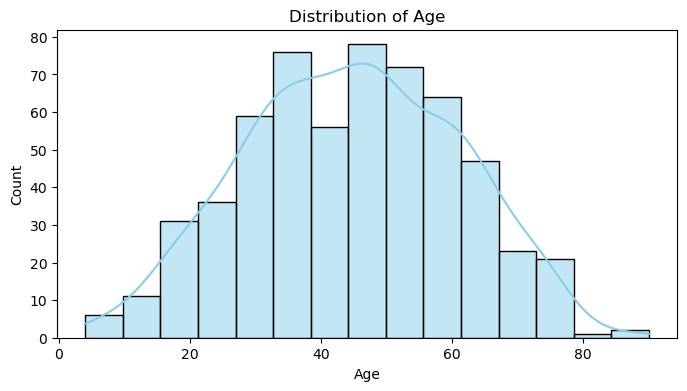

C:\Users\daj_k\AppData\Local\Temp\ipykernel_35268\3774532224.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


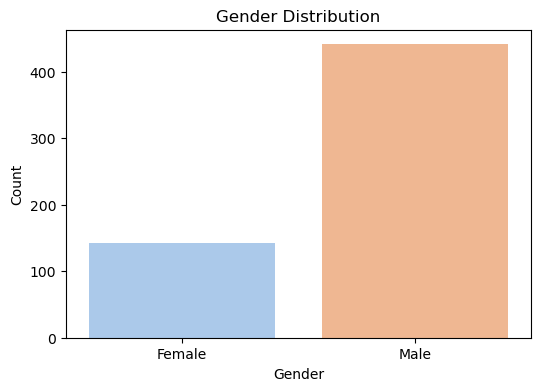

In [22]:
# Histogram for Age
plt.figure(figsize=(8,4))
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Countplot for the Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [23]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [24]:
# Drop rows with missing values for model training
model_data = data.dropna()

# Check the new shape after dropping missing values
model_data.shape

(579, 11)

In [25]:
# Define features (X) and target (y)
X = model_data.drop('Dataset', axis=1)
y = model_data['Dataset']

# Display shapes of X and y
X.shape, y.shape

((579, 10), (579,))

In [26]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Show the shapes of the new sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((405, 10), (174, 10), (405,), (174,))

In [27]:
# Logistic Regression Model

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Calculate accuracy
log_accuracy = accuracy_score(y_test, y_pred_log)
log_accuracy

0.6609195402298851

In [28]:
# Decision Tree Classifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_accuracy

0.6839080459770115

**Task 2. Statistical Evaluation**

This task provides a statistical overview of the dataset to better understand the distribution and characteristics of the variables.

In [29]:
#Cleaning data from null values:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())
print("NULL COUNTS AFTER CLEANING NULL VALUES:")
print("-" * 55)
print(data.isnull().sum())
print("\n\n")

NULL COUNTS AFTER CLEANING NULL VALUES:
-------------------------------------------------------
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64





In [30]:
#Apply describtive statistics 
print("DESCRIBTIVE STATISTICS")
print("-"*55)
desc_stats = data.describe()
print(desc_stats)
print("\n\n")

#Central tendency and other statistics
print("CENTRAL TENDENCY & DISPERSION STATISTICS")
print("-"*55)
for col in data.select_dtypes(include=[np.number]).columns:
    print(f"\n{col}:")
    print(f"  Mean: {round(data[col].mean(), 2)}")
    print(f"  Median: {round(data[col].median(), 2)}")
    print(f"  Mode: {round(data[col].mode()[0], 2)}")
    print(f"  Std Dev: {round(data[col].std(), 2)}")
    print(f"  Variance: {round(data[col].var(), 2)}")
    print(f"  Range: {round(data[col].max() - data[col].min(), 2)}")
    print(f"  IQR: {round(data[col].quantile(0.75) - data[col].quantile(0.25), 2)}")




DESCRIBTIVE STATISTICS
-------------------------------------------------------
              Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  583.000000  583.000000       583.000000        583.000000   
mean    44.746141    0.756432         3.298799          1.486106   
std     16.189833    0.429603         6.209522          2.808498   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    1.000000         0.800000          0.200000   
50%     45.000000    1.000000         1.000000          0.300000   
75%     58.000000    1.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            583.000000                583.000000   
mean             290.576329                 80.713551   
std              242.937989                182.620356   
min               63.000000                 10.000000   
25%              175.50

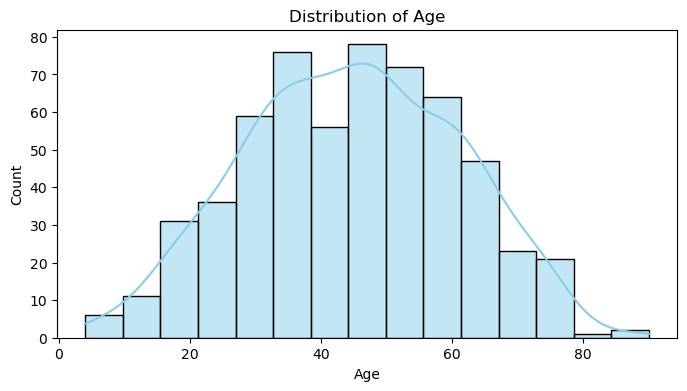

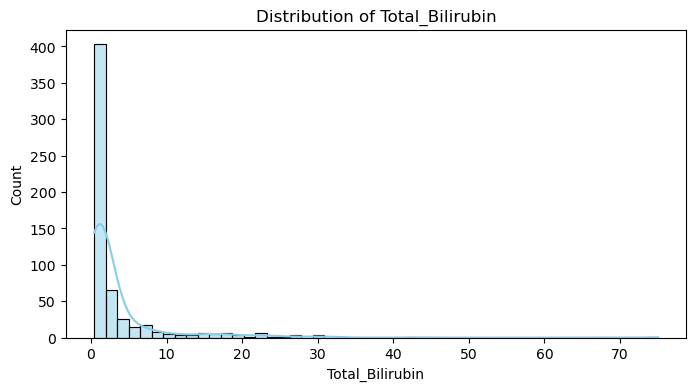

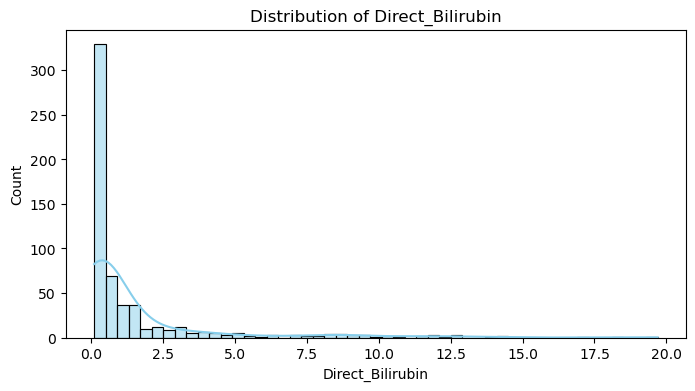

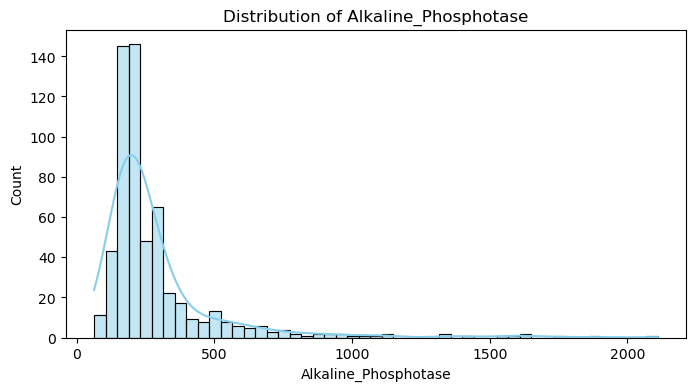

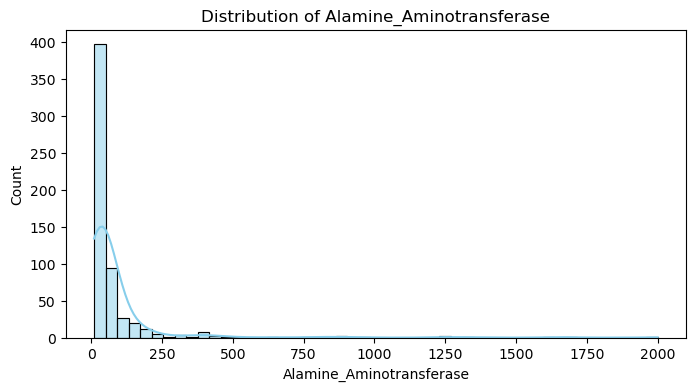

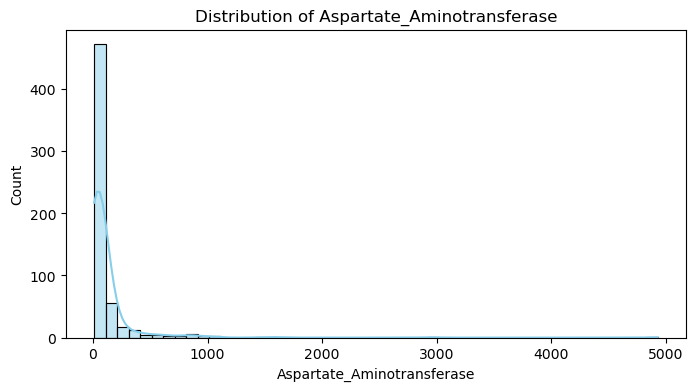

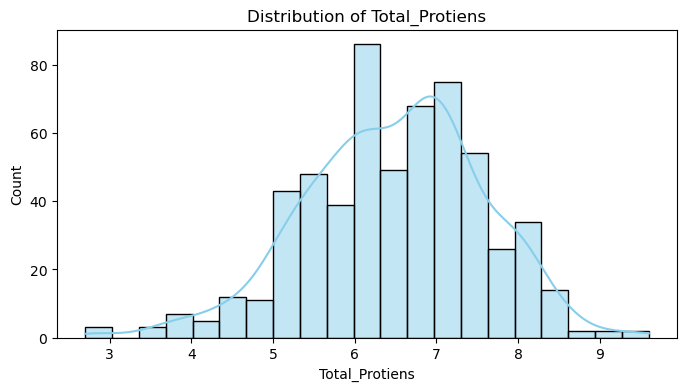

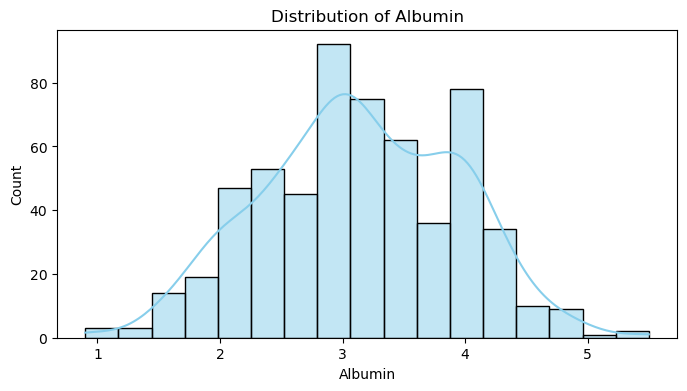

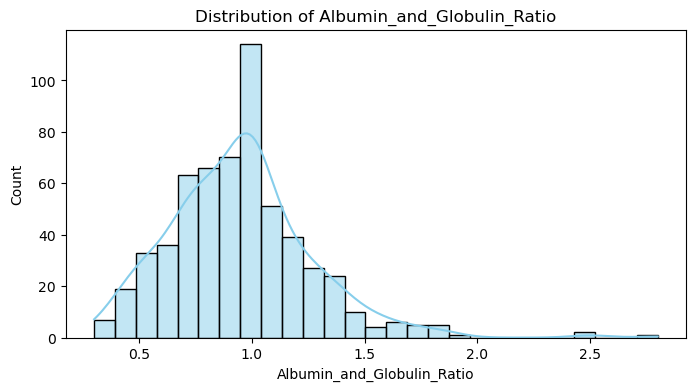

In [31]:
#VISULIZE DATA/ histograms
#---------------
def make_histogram(att):
    plt.figure(figsize=(8,4))
    sns.histplot(data[att], kde=True, color='skyblue')
    plt.title("Distribution of " + att)
    plt.xlabel(att)
    plt.ylabel("Count")
    plt.show()
    return plt.show()

make_histogram("Age")
print("\n")
make_histogram("Total_Bilirubin")
print("\n")
make_histogram("Direct_Bilirubin")
print("\n")
make_histogram("Alkaline_Phosphotase")
print("\n")
make_histogram("Alamine_Aminotransferase")
print("\n")
make_histogram("Aspartate_Aminotransferase")
print("\n")
make_histogram("Total_Protiens")
print("\n")
make_histogram("Albumin")
print("\n")
make_histogram("Albumin_and_Globulin_Ratio")

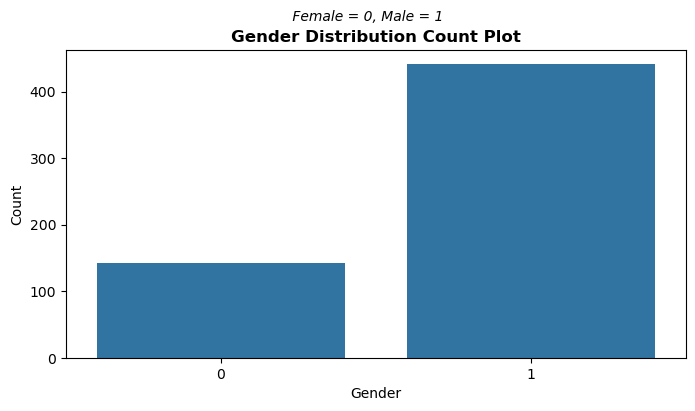

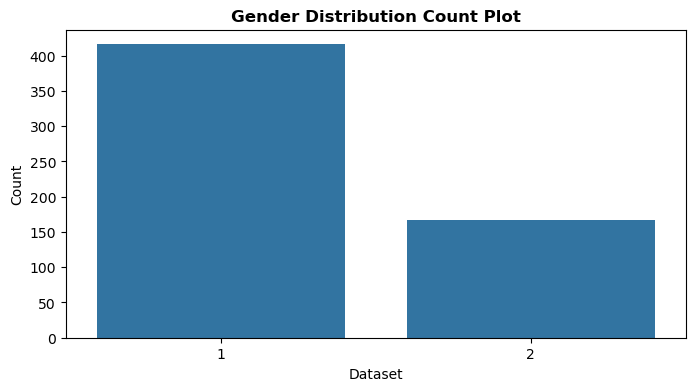

In [32]:
print("\n")
#GENDER - Count plot
plt.figure(figsize=(8, 4))
plt.title('Gender Distribution Count Plot', fontweight='bold')
sns.countplot(x='Gender', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.suptitle(' Female = 0, Male = 1', fontsize=10, style='italic')
plt.show()
#Dataset
plt.figure(figsize=(8, 4))
plt.title('Gender Distribution Count Plot', fontweight='bold')
sns.countplot(x='Dataset', data=data)
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.show()

In [33]:
#Apply skewness analysis 
skewness = data.skew()
print("SKEWNESS VALUES:")
print("-"*55)
print(skewness)
print("\n\n")

print("INTERPRETATION:")
print("-"*55)
for col, skew_val in skewness.items():
    if abs(skew_val) < 0.5:
        print("Approximately symmetric")
    elif abs(skew_val) < 1:
        print("Moderately skewed")
    else:
        print("Highly skewed")

SKEWNESS VALUES:
-------------------------------------------------------
Age                           -0.029385
Gender                        -1.197919
Total_Bilirubin                4.907474
Direct_Bilirubin               3.212403
Alkaline_Phosphotase           3.765106
Alamine_Aminotransferase       6.549192
Aspartate_Aminotransferase    10.546177
Total_Protiens                -0.285672
Albumin                       -0.043685
Albumin_and_Globulin_Ratio     0.995703
Dataset                        0.947140
dtype: float64



INTERPRETATION:
-------------------------------------------------------
Approximately symmetric
Highly skewed
Highly skewed
Highly skewed
Highly skewed
Highly skewed
Highly skewed
Approximately symmetric
Approximately symmetric
Moderately skewed
Moderately skewed


**Task 3. Data Preprocessing**

This task prepares the dataset for modeling by cleaning the data, handling missing values, and applying any needed transformations.

**Task 4. Outlier Analysis**

This task identifies unusual or extreme values in the dataset and describes how they are evaluated and addressed.

**Task 5. Model Implementation**



**Logistic Regression**

This part applies logistic regression to the dataset and explores ways to improve its performance.

**Decision Trees and Random Forest**

This part applies decision tree and random forest models to classify the data and optimize their results.

**Task 6. Model Comparison**

This task compares the performance of all implemented models to determine which one performs best.